In [22]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [23]:
n = 10
A = np.eye(n)*np.arange(1,11)
b = np.ones(n)
x0 = np.zeros(n)

In [24]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x, i : A[i] * ( A[i].T @ x - b[i])

In [25]:
def SAGA(x0, grad, func):    
    xk = x0
    y = [grad(xk, i) for i in range(n)]
    sum_y = sum(y)
    L = max(np.linalg.eigh(A.T @ A)[0])
    hk = 1 / (3 * L)
    res = [func(xk)]
    while True:
        j = np.random.randint(1, n)
        sum_y -= y[j]
        y[j] = grad(xk, j)
        sum_y += y[j]
        xk = xk - hk * (grad(xk, j) - y[j] + sum_y / n)
        res.append(func(xk))
        if abs(res[-1] - res[-2]) < 1e-4:
            return res

In [26]:
res = SAGA(x0, grad, func)

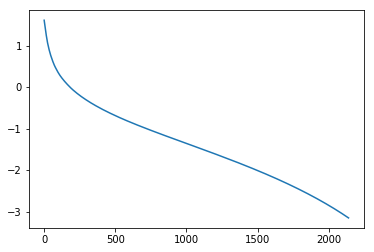

In [27]:
plt.plot(np.log(res))
plt.show()
# A = np.array([[i + j + 1 for i in range(1, 11)] for j in range(1, 11)])

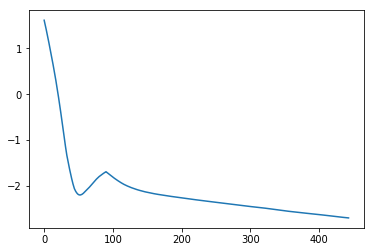

In [11]:
plt.plot(np.log(res))
plt.show()
#A = np.array([[max(i, j) + 1 for i in range(1, 11)] for j in range(1, 11)])

In [ ]:
plt.plot(np.log(res))
plt.show()
#A = np.array([[1 / (i + j + 1)  for i in range(10)] for j in range(10)])

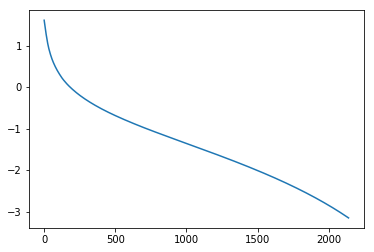

In [20]:
plt.plot(np.log(res))
plt.show()
#A = np.eye(n)*np.arange(1,11)